## Project 3b Retail Biz Segmentation ##

*Step 1: Import Libraries*

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Setting up the visualization style
sns.set(style="whitegrid")


*Step 2: Load the Dataset*

In [10]:
# Step 1: Load the dataset
data_path = r"C:\Users\Hello\Downloads\Mall_Customers.csv"
data = pd.read_csv(data_path)

*Step 3: Explore Data*

In [13]:
# Summary statistics
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


*Step 4: Check for Missing Values*

In [16]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


*Step 5: Data Visualization*

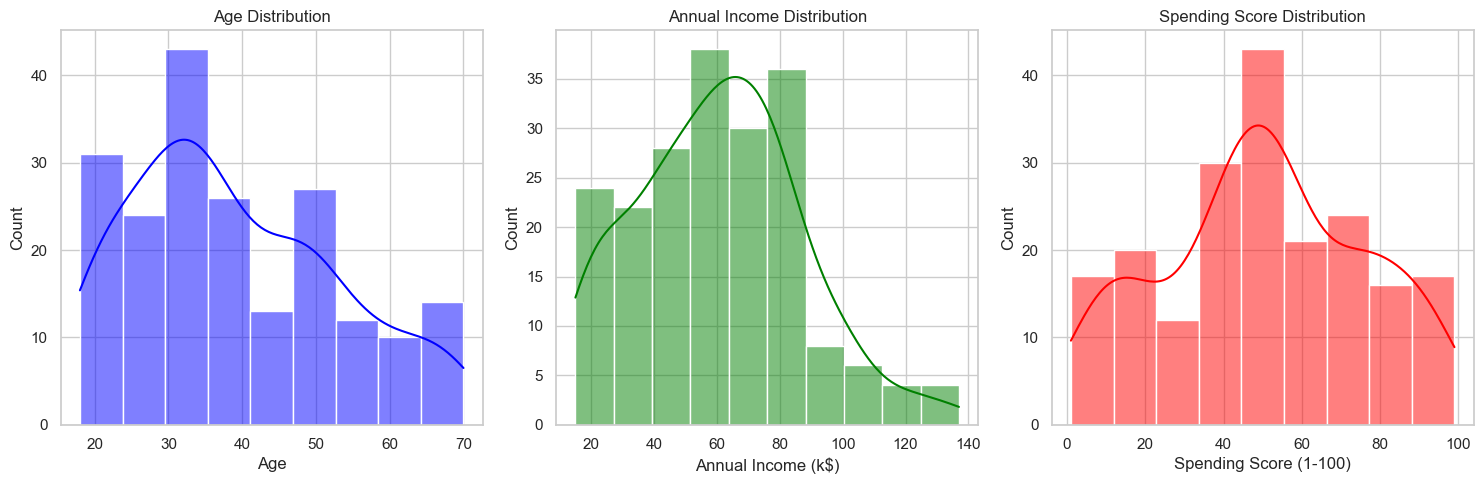

In [19]:
# Visualize the distribution of Age, Income, and Spending Score
plt.figure(figsize=(15, 5))

# Age distribution
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True, color='blue')
plt.title('Age Distribution')

# Annual Income distribution
plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True, color='green')
plt.title('Annual Income Distribution')

# Spending Score distribution
plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True, color='red')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()


*Step 6: Feature Selection and Standardization*

In [22]:
# Selecting relevant features
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


*Step 7: Determine Optimal Number of Clusters*

C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

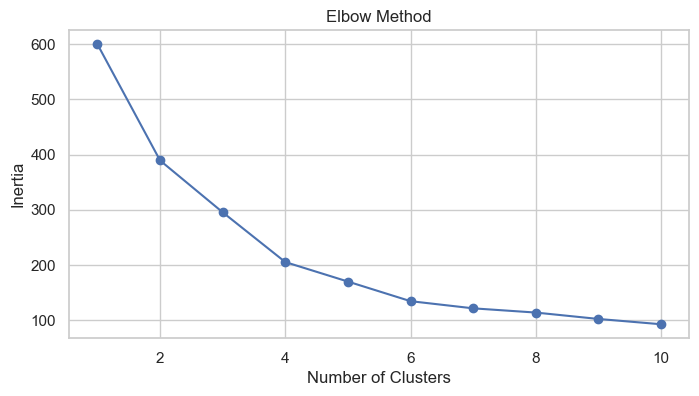

In [25]:
# Elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

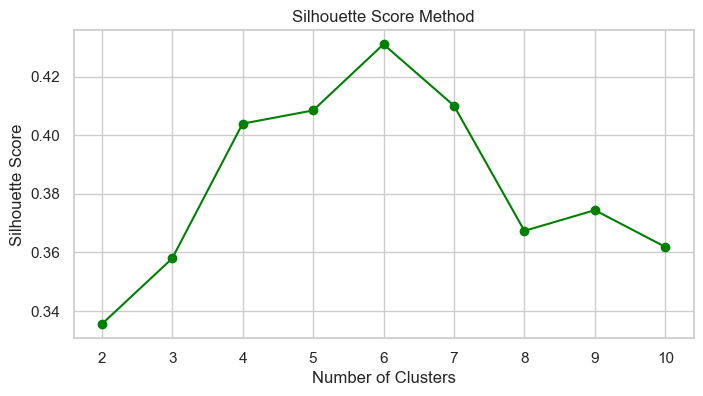

In [27]:
# Silhouette Score for optimal cluster validation
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, cluster_labels))

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


*Step 8: Apply K-means Clustering*

In [30]:
# Apply K-means clustering with optimal clusters (e.g., 5)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)


C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


*Step 9: Visualize Clusters*

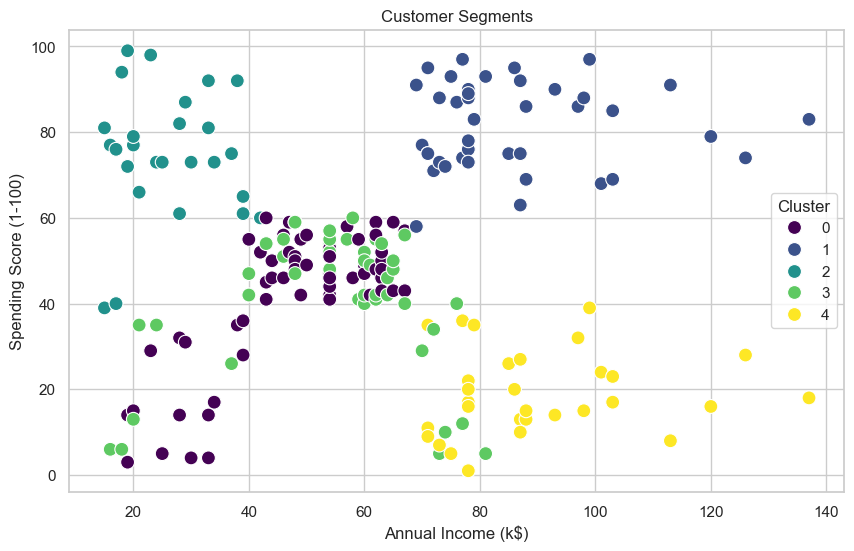

In [33]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], 
                hue=data['Cluster'], palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


*Step 10: Draw Insights*

In [36]:
# Cluster characteristics
for i in range(optimal_clusters):
    print(f"Cluster {i}:")
    print(data[data['Cluster'] == i].describe())


Cluster 0:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   58.000000  58.000000           58.000000               58.000000   
mean    68.775862  55.275862           47.620690               41.706897   
std     31.021805   8.571256           13.413567               15.697814   
min      9.000000  40.000000           19.000000                3.000000   
25%     45.500000  49.000000           39.250000               37.250000   
50%     69.500000  53.000000           48.500000               46.000000   
75%     92.500000  63.750000           59.750000               52.000000   
max    120.000000  70.000000           67.000000               60.000000   

       Cluster  
count     58.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  
Cluster 1:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count    40.00000  40.000000           40.000000               4